In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv("deliverytime.txt")
print(data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [3]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM, Input

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [6]:
# Set the earth's radius (in kilometers)
R = 6371

In [7]:
# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

In [8]:
# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [9]:
# Calculate the distance between each pair of points
data['distance'] = np.nan


In [10]:
for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

We have now calculated the distance between the restaurant and the delivery location. We have also added a new feature in the dataset as distance. 

In [11]:
print(data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

Data Exploration


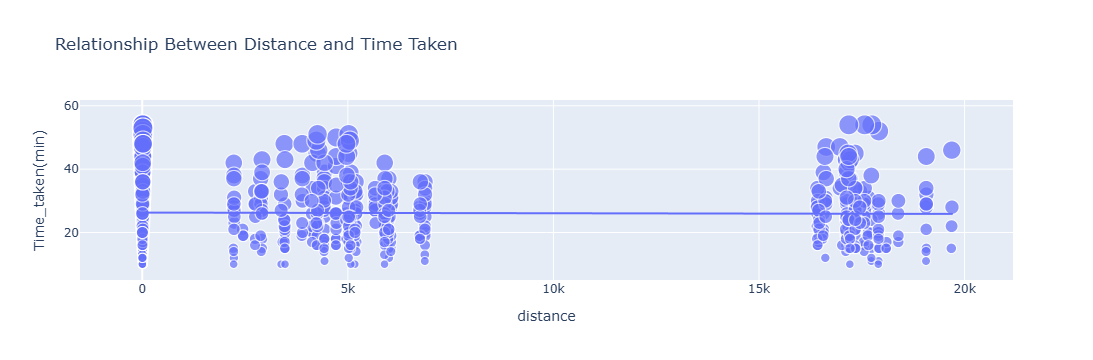

In [12]:
figure = px.scatter(data_frame = data, 
                    x="distance",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    trendline="ols", 
                    title = "Relationship Between Distance and Time Taken")
figure.show()

There is a consistent relationship between the time taken and the distance travelled to deliver the food. It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.

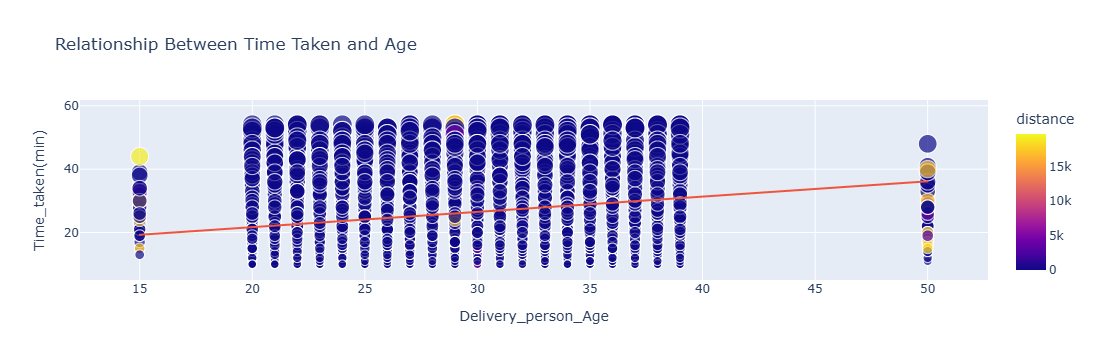

In [13]:
figure = px.scatter(data_frame = data, 
                    x="Delivery_person_Age",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between Time Taken and Age")
figure.show()

There is an inverse linear relationship between the time taken to deliver the food and the ratings of the delivery partner. It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.

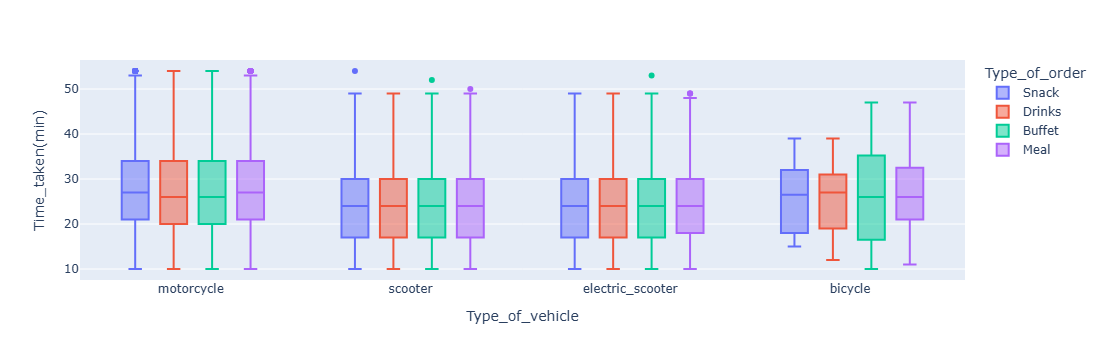

In [14]:
fig = px.box(data, 
             x="Type_of_vehicle",
             y="Time_taken(min)", 
             color="Type_of_order")
fig.show()

So there is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.

Food Delivery Time Prediction Model

In [15]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "distance"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

In [17]:
# imports
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [18]:
# create the LSTM neural network model
model = Sequential()
model.add(Input(shape=(xtrain.shape[1], 1)))  # explicit Input layer
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 351s 8ms/step - loss: 69.5824
Epoch 2/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 294s 7ms/step - loss: 63.7239
Epoch 3/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 237s 5ms/step - loss: 61.3411
Epoch 4/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 270s 5ms/step - loss: 60.4561
Epoch 5/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 271s 6ms/step - loss: 59.8091
Epoch 6/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 260s 6ms/step - loss: 59.3359
Epoch 7/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 238s 6ms/step - loss: 59.2713
Epoch 8/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 264s 6ms/step - loss: 59.4673
Epoch 9/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 305s 6ms/step - loss: 58.8255


Now let’s test the performance of our model by giving inputs to predict the food delivery time:

In [23]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction


Age of Delivery Partner:  50
Ratings of Previous Deliveries:  4
Total Distance:  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Delivery Time in Minutes =  [[34.17189]]


To predict the food delivery time in real time, you need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, you need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.